In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn import preprocessing

In [2]:
# Reading data
df = pd.read_csv('vehicles.csv')
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [3]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
# show first 10 rowes
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [5]:
# random sample from data
df.sample(4)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
424845,7307765013,https://milwaukee.craigslist.org/ctd/d/waukega...,milwaukee,https://milwaukee.craigslist.org,17000,2020.0,toyota,corolla,excellent,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00h0h_4bS04RXUiy...,2020 *** Toyota Corolla LE Sedan *** Ready ...,NaN,wi,42.364188,-87.864796,2021-04-16T11:30:15-0500
57234,7314670939,https://sandiego.craigslist.org/csd/ctd/d/san-...,san diego,https://sandiego.craigslist.org,26999,2018.0,mercedes-benz,c 350e gas/electri,NaN,4 cylinders,...,compact,sedan,grey,https://images.craigslist.org/00e0e_js4IBq9vuT...,Enter this link to see more images plus all ot...,NaN,ca,32.823870,-117.155200,2021-04-29T20:39:22-0700
16007,7312276971,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,17334,2011.0,chevrolet,camaro,NaN,NaN,...,NaN,coupe,blue,https://images.craigslist.org/00y0y_gebSqMN4nd...,Still available as of 2021-05-02 2011 Chevrol...,NaN,az,32.235390,-110.916482,2021-04-25T06:02:03-0700
149050,7311603789,https://stlouis.craigslist.org/ctd/d/clinton-t...,"st louis, MO",https://stlouis.craigslist.org,52880,2021.0,gmc,sierra 1500,NaN,NaN,...,NaN,pickup,NaN,https://images.craigslist.org/00M0M_eejSylHJ3s...,➔ Want to see more pictures?Paste this link to...,NaN,il,38.382623,-93.773440,2021-04-23T17:01:47-0500


In [6]:
# statistic information 
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [7]:
print("The max and min respectively")
print(df['price'].max())
print(df['price'].min())

The max and min respectively
3736928711
0


In [8]:
# show last 5 rows
df.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [9]:
# show 
print(df.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [10]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [11]:
df.isna().sum()  # Nulls

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [12]:
df.shape

(426880, 26)

In [13]:
df['year'] = df.year.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          426880 non-null  object 
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [14]:
# clean data 

In [15]:
drop_cols =['url','image_url', 'size', 'VIN','county']
df.drop(columns=drop_cols , axis=1, inplace=True)

df.head()

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
0,7222695916,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [16]:
category = ['manufacturer','cylinders','fuel','title_status','transmission','drive','type','paint_color','condition','year','posting_date'
           ,'state','description','model','region','region_url']
numerical = df.drop(category, axis=1)
categorical = df[category]
numerical.head()

,id,price,odometer,lat,long
0,7222695916,6000,NaN,NaN,NaN
1,7218891961,11900,NaN,NaN,NaN
2,7221797935,21000,NaN,NaN,NaN
3,7222270760,1500,NaN,NaN,NaN
4,7210384030,4900,NaN,NaN,NaN


In [17]:
categorical.head()

,manufacturer,cylinders,fuel,title_status,transmission,drive,type,paint_color,condition,year,posting_date,state,description,model,region,region_url
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,az,NaN,NaN,prescott,https://prescott.craigslist.org
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,ar,NaN,NaN,fayetteville,https://fayar.craigslist.org
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,fl,NaN,NaN,florida keys,https://keys.craigslist.org
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,ma,NaN,NaN,worcester / central MA,https://worcester.craigslist.org
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nc,NaN,NaN,greensboro,https://greensboro.craigslist.org


In [18]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   manufacturer  409234 non-null  object
 1   cylinders     249202 non-null  object
 2   fuel          423867 non-null  object
 3   title_status  418638 non-null  object
 4   transmission  424324 non-null  object
 5   drive         296313 non-null  object
 6   type          334022 non-null  object
 7   paint_color   296677 non-null  object
 8   condition     252776 non-null  object
 9   year          426880 non-null  object
 10  posting_date  426812 non-null  object
 11  state         426880 non-null  object
 12  description   426810 non-null  object
 13  model         421603 non-null  object
 14  region        426880 non-null  object
 15  region_url    426880 non-null  object
dtypes: object(16)
memory usage: 52.1+ MB


In [19]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        426880 non-null  int64  
 1   price     426880 non-null  int64  
 2   odometer  422480 non-null  float64
 3   lat       420331 non-null  float64
 4   long      420331 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 16.3 MB


In [20]:
#fill value in numerical with mean
for num in numerical:
    mean = numerical[num].mean()
    numerical[num]=numerical[num].fillna(mean) 

In [21]:
for i in  categorical:
    print(i)

manufacturer
cylinders
fuel
title_status
transmission
drive
type
paint_color
condition
year
posting_date
state
description
model
region
region_url


In [22]:
#detect numerical missing value
numerical.isnull().sum().sort_values(ascending=False) 

id          0
price       0
odometer    0
lat         0
long        0
dtype: int64

In [23]:
categorical.columns

Index(['manufacturer', 'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'condition', 'year', 'posting_date',
       'state', 'description', 'model', 'region', 'region_url'],
      dtype='object')

In [49]:
for cat in categorical:
    mode = categorical[cat].mode().values[0]
    categorical[cat]=df[cat].fillna(mode)
    


In [51]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
#detect categorical missing value
categorical.isnull().sum().sort_values(ascending=False) 

manufacturer    0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
condition       0
year            0
posting_date    0
state           0
description     0
model           0
region          0
region_url      0
dtype: int64

In [26]:
categorical.head()


,manufacturer,cylinders,fuel,title_status,transmission,drive,type,paint_color,condition,year,posting_date,state,description,model,region,region_url
0,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,az,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,prescott,https://prescott.craigslist.org
1,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,ar,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,fayetteville,https://fayar.craigslist.org
2,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,fl,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,florida keys,https://keys.craigslist.org
3,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,ma,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,worcester / central MA,https://worcester.craigslist.org
4,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,nc,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,greensboro,https://greensboro.craigslist.org


In [27]:
numerical.head()


,id,price,odometer,lat,long
0,7222695916,6000,98043.331443,38.49394,-94.748599
1,7218891961,11900,98043.331443,38.49394,-94.748599
2,7221797935,21000,98043.331443,38.49394,-94.748599
3,7222270760,1500,98043.331443,38.49394,-94.748599
4,7210384030,4900,98043.331443,38.49394,-94.748599


In [73]:
#concat table categorical and numerical to create new table without missing values
df2 = pd.concat([categorical,numerical],axis=1)
df2.head()

,manufacturer,cylinders,fuel,title_status,transmission,drive,type,paint_color,condition,year,...,state,description,model,region,region_url,id,price,odometer,lat,long
0,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,...,az,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,prescott,https://prescott.craigslist.org,7222695916,6000,98043.331443,38.49394,-94.748599
1,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,...,ar,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,fayetteville,https://fayar.craigslist.org,7218891961,11900,98043.331443,38.49394,-94.748599
2,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,...,fl,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,florida keys,https://keys.craigslist.org,7221797935,21000,98043.331443,38.49394,-94.748599
3,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,...,ma,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,worcester / central MA,https://worcester.craigslist.org,7222270760,1500,98043.331443,38.49394,-94.748599
4,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,...,nc,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,greensboro,https://greensboro.craigslist.org,7210384030,4900,98043.331443,38.49394,-94.748599


 Analysis part




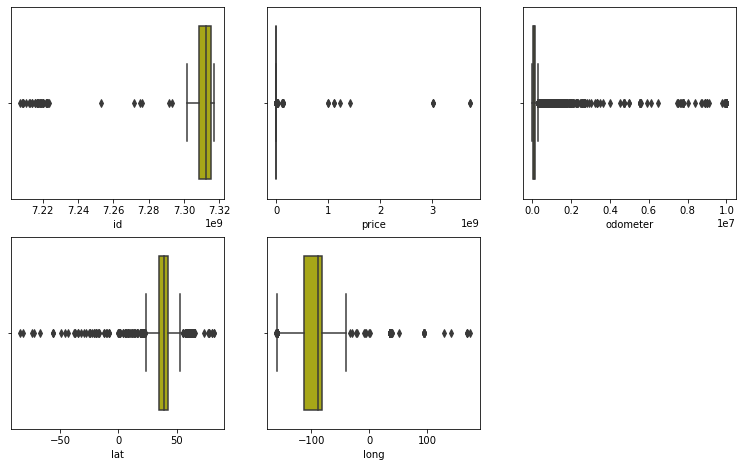

In [30]:
#outlier detection in numerical
fig=plt.figure(figsize=(13,12))
axes=330

#put numerical
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    #set title of num
    sns.boxplot(data = numerical, x=num, color="y") 
plt.show()

Based on boxplot visualization for numeric feature. thevariable long, lat, and odomater has too many outliers
so that we can drop it from the table.
the price has so many outlier too..

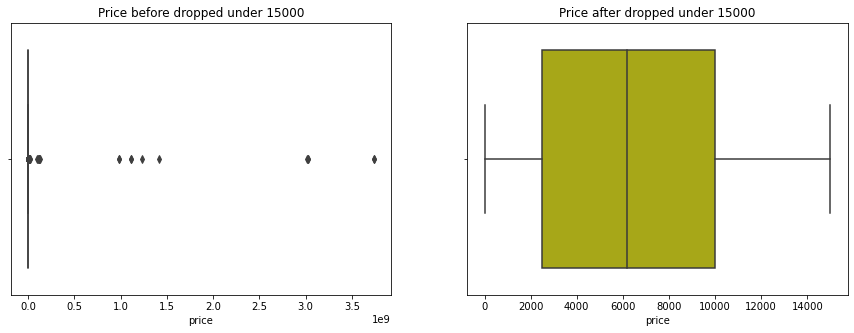

In [188]:
filterprice=df2[df2['price']<15000]
fig=plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
sns.boxplot(numerical['price'])
plt.title('Price before dropped under 15000')
fig.add_subplot(1,2,2)
sns.boxplot(filterprice['price'], color="y")
plt.title('Price after dropped under 15000');

In [186]:
warnings.filterwarnings('ignore')

In [33]:
#drop column long lat and odometer because there is too many outliers.
d_final = df2.drop(columns=['long', 'lat', 'odometer'])
d_final.head()

,manufacturer,cylinders,fuel,title_status,transmission,drive,type,paint_color,condition,year,posting_date,state,description,model,region,region_url,id,price
0,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,az,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,prescott,https://prescott.craigslist.org,7222695916,6000
1,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,ar,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,fayetteville,https://fayar.craigslist.org,7218891961,11900
2,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,fl,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,florida keys,https://keys.craigslist.org,7221797935,21000
3,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,ma,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,worcester / central MA,https://worcester.craigslist.org,7222270760,1500
4,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,nc,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,greensboro,https://greensboro.craigslist.org,7210384030,4900


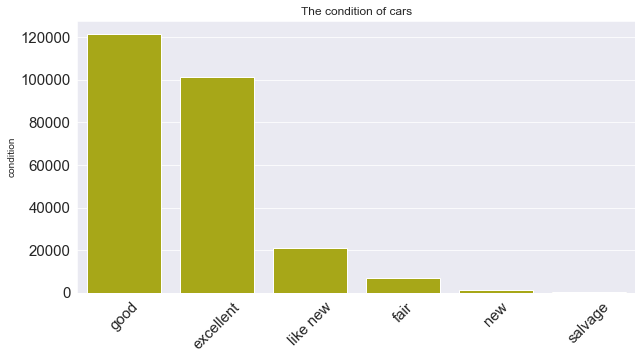

In [267]:
#1 For Category
con=df['condition'].value_counts().head(30)
plt.figure(figsize=(10,5))
sns.barplot(con.index,con, color='y')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15);
plt.title('The condition of cars');

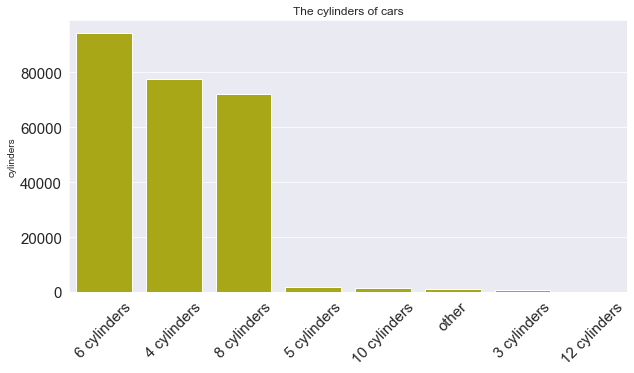

In [268]:
#2

cl=df['cylinders'].value_counts().head(30)
plt.figure(figsize=(10,5))
sns.barplot(cl.index,cl ,color='y')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15);
plt.title('The cylinders of cars');

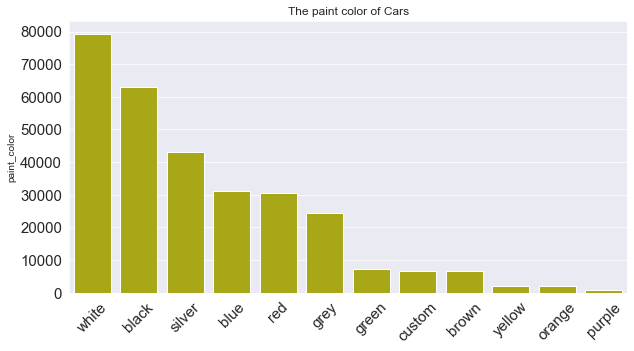

In [269]:
#3

paint=df['paint_color'].value_counts().head(30)
plt.figure(figsize=(10,5))
sns.barplot(paint.index,paint, color='y')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15);
plt.title('The paint color of Cars');

# Questions :

# 1. The most common manufacturers in dataset based on number of cars.
# 2. The Highest Price Based on Types of Cars.

The answer for first Question

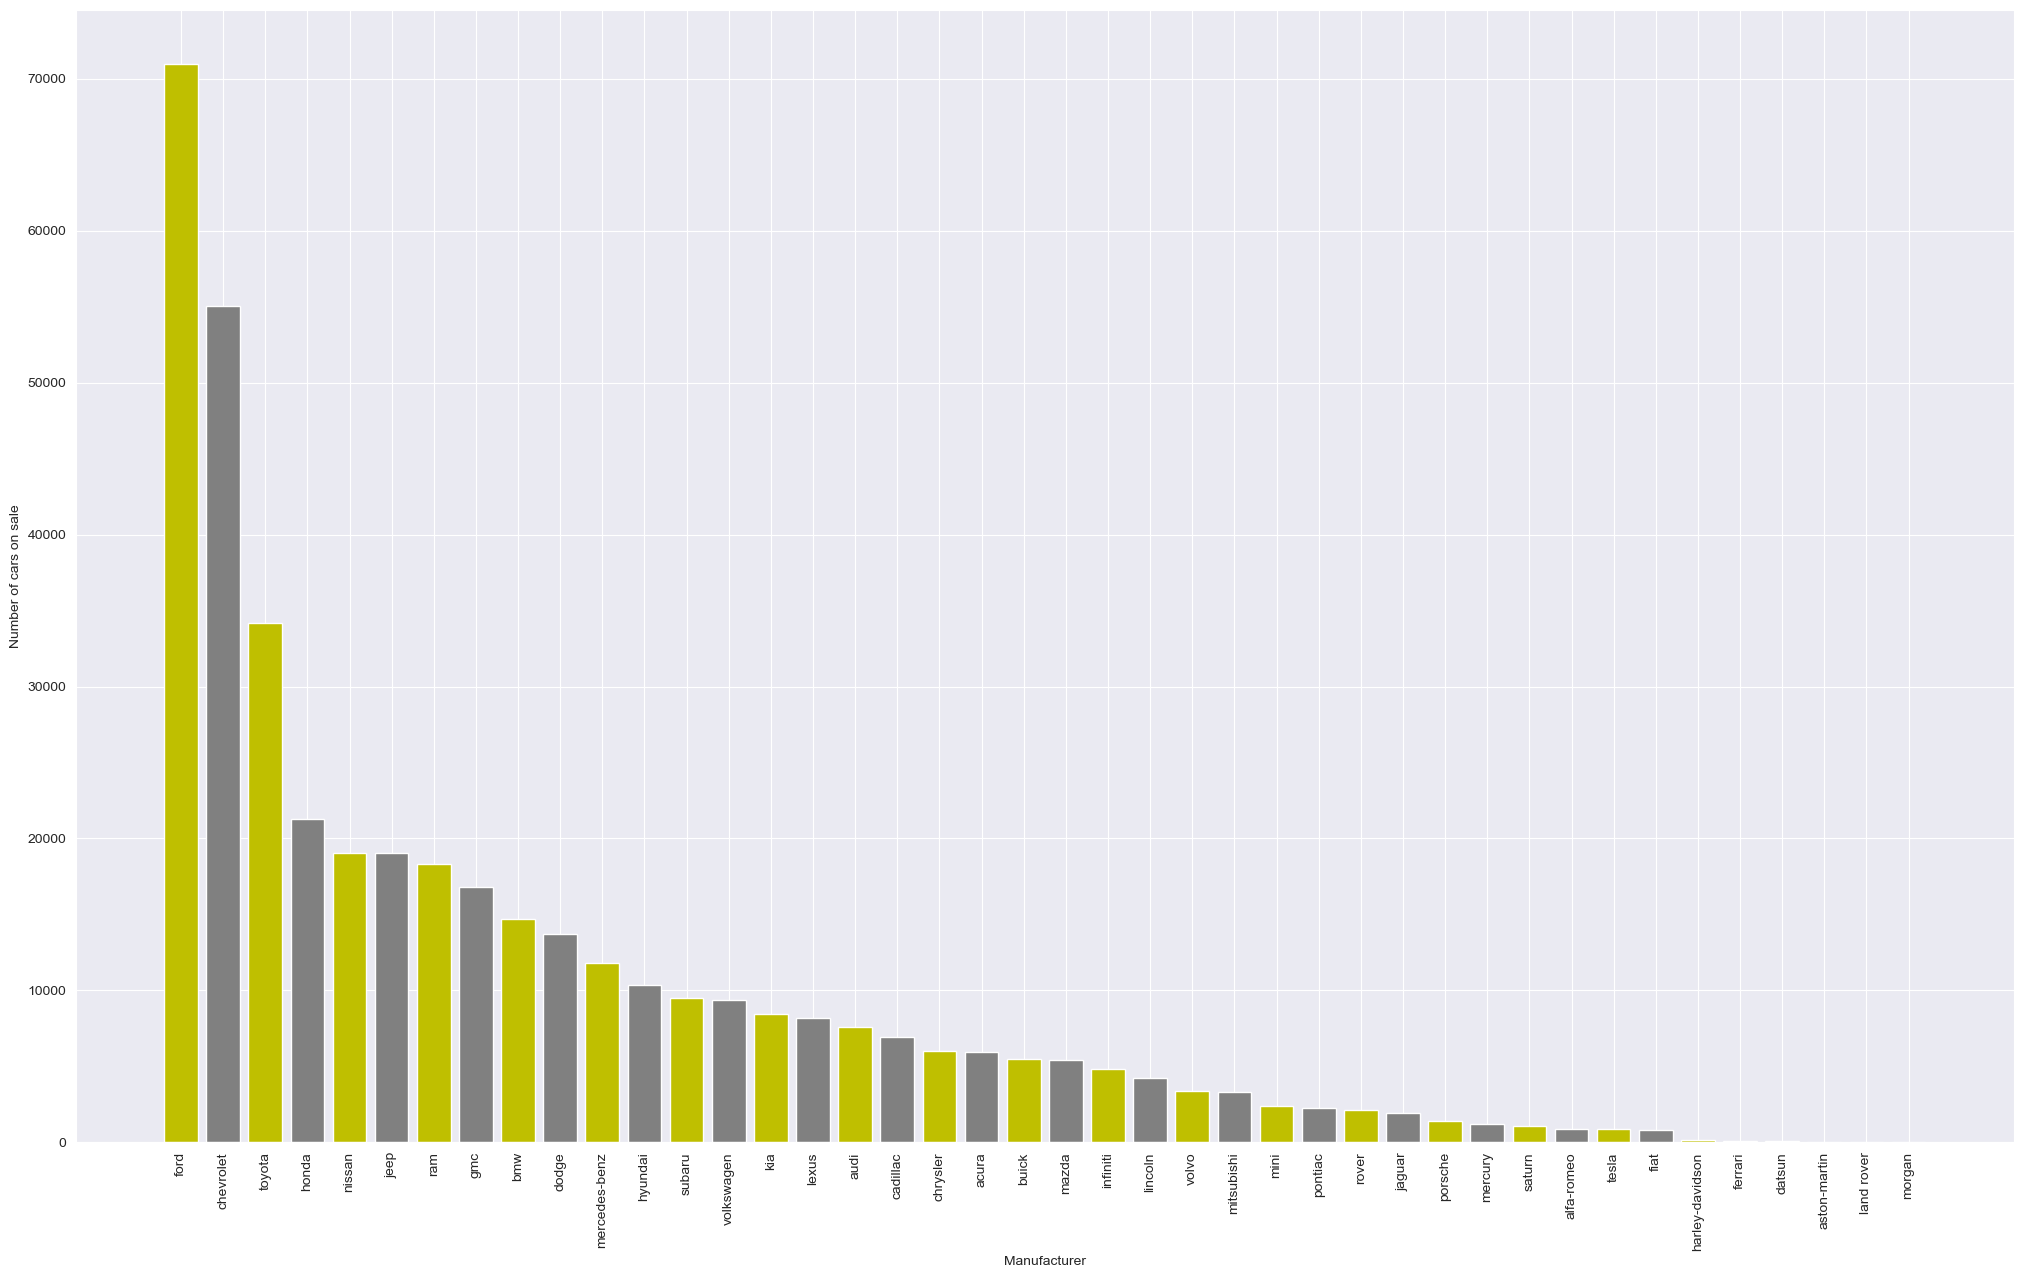

In [256]:
manufacturers_counts = df['manufacturer'].value_counts().to_dict()
fig = plt.figure(figsize=(25, 15), dpi= 100, facecolor='w', edgecolor='w')
plt.bar(manufacturers_counts.keys(),manufacturers_counts.values(),color=['y','grey'])
plt.xticks(rotation = 90);
plt.xlabel('Manufacturer');
plt.ylabel('Number of cars on sale');

 ^  the most frequent manufacturers in the top are : (Ford, Chevrolet, toyota, etc.). 

The answer for Highest Price Based on Type Car?

In [38]:
joins = df[['manufacturer','type','price']]

join_group =joins.groupby('type').mean().head(5).sort_values('price',ascending=False)


join_group

,price
type,
SUV,34434.047552
coupe,21937.563424
convertible,19999.774285
hatchback,14384.513375
bus,14105.617021


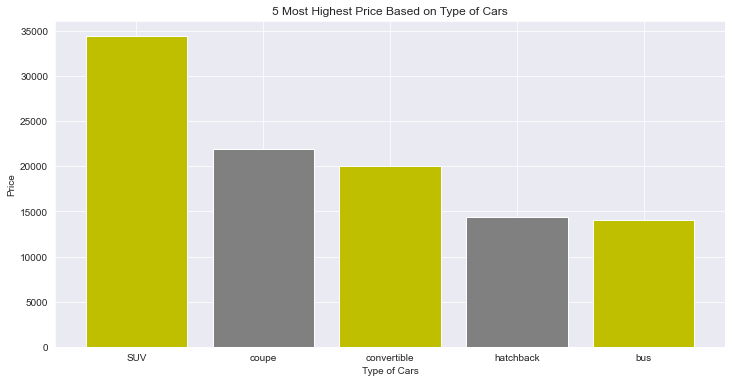

In [263]:

plt.figure(figsize=(12,6))

x=range(5)
plt.bar(x,join_group['price'], color=['y','grey'])
plt.xticks(x,join_group.index)
plt.xlabel('Type of Cars')
plt.ylabel('Price')
plt.title('5 Most Highest Price Based on Type of Cars')
plt.show()

The most transmission type used based on manufacturer?


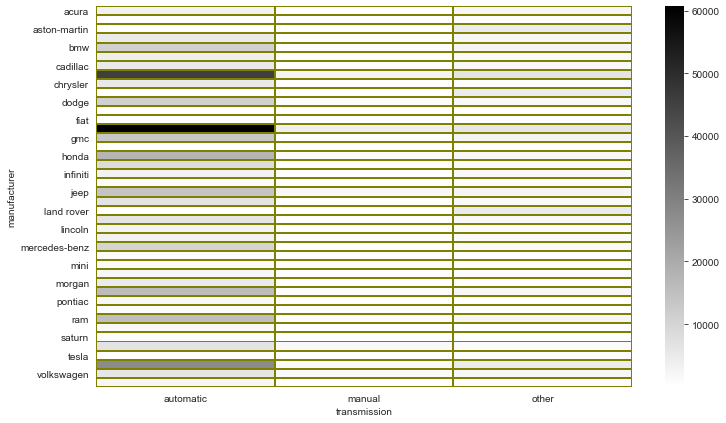

In [270]:

trans_ser = df.groupby('manufacturer').transmission.value_counts()
trans_ser_df = pd.DataFrame(trans_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(trans_ser_df,  cmap='gray_r', linecolor='olive',linewidth=1);

The type of cylinders based on price of Cars.

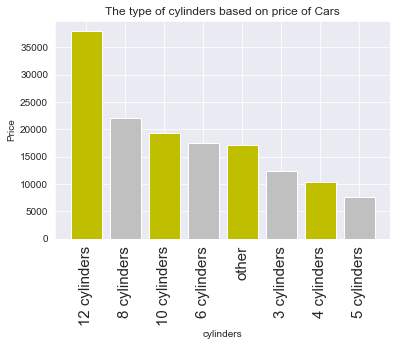

In [271]:
cylinder_with_price=df[['cylinders','price']]
cylinder_with_price=cylinder_with_price[cylinder_with_price['price']<=150000]



f.add_subplot(2,1,2)
state=cylinder_with_price[['cylinders','price']].groupby('cylinders').mean().sort_values('price',ascending=False).head(20)
state.reset_index(level=0,inplace=True)

plt.bar(state['cylinders'],state['price'], color=['y','silver'])
               
plt.xticks(rotation=90,fontsize=15)
plt.subplots_adjust(hspace = 0.5)
plt.xlabel('cylinders')
plt.ylabel('Price')
plt.title('The type of cylinders based on price of Cars');
plt.show()


Price of type of cars for each type of fuel

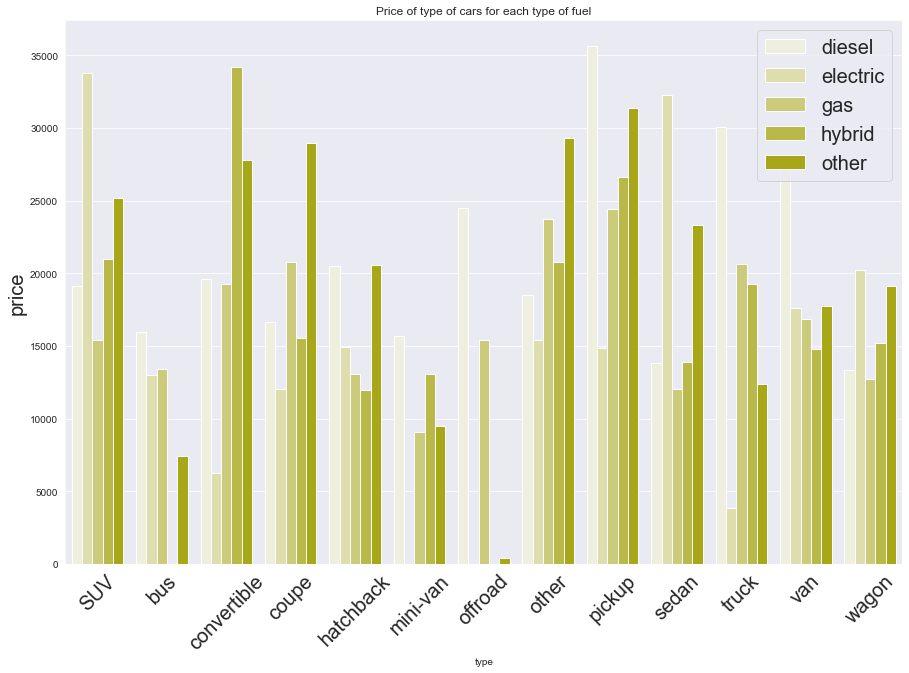

In [266]:
try2=df[['type','fuel','price']][df['price']<=150000].groupby(['type','fuel']).mean()
try2.reset_index(level=0,inplace=True)
try2.reset_index(level=0,inplace=True)
try2=try2.sort_values(['type','fuel'])
plt.figure(figsize=(15,10))
sns.barplot(x='type', y='price', hue='fuel', data=try2, color='y')
plt.xticks(rotation=45,fontsize=20)
plt.ylabel('price',fontsize=20)
plt.legend(fontsize=20)
plt.title('Price of type of cars for each type of fuel');